In [2]:
import pandas as pd 
import numpy as np

In [20]:
df_obesity = pd.read_csv('obesity_cleaned.csv')
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [5]:
# método to_frame() ou []

# transforma em um DataFrame

type(df_obesity['Sex'].to_frame())

pandas.core.frame.DataFrame

In [8]:
# método transpose - transforma linha em coluna e vice-verso.

df_obesity[['Sex']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,24560,24561,24562,24563,24564,24565,24566,24567,24568,24569
Sex,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female


In [10]:
# método shift() - descola os elementos do DataFrame em n posições, descartando o(s) último(s) elementos

df_obesity[['Year']].shift(1)

,Year
0,NaN
1,1975.0
2,1975.0
3,1975.0
4,1976.0
...,...
24565,2015.0
24566,2015.0
24567,2015.0
24568,2016.0


In [11]:
df_obesity[['Year']] - df_obesity[['Year']].shift(1)

,Year
0,NaN
1,0.0
2,0.0
3,1.0
4,0.0
...,...
24565,0.0
24566,0.0
24567,1.0
24568,0.0


In [12]:
# método isin() - só funciona para series
# Retorna valores que estiverem dentro daquele intervala selecionado, devolve True ou  False

df_obesity['Year'].isin([1900, 1901, 1975])

0         True
1         True
2         True
3        False
4        False
         ...  
24565    False
24566    False
24567    False
24568    False
24569    False
Name: Year, Length: 24570, dtype: bool

In [14]:
# método iterrows() - serve para DataFrames não muito grandes
# utilizamos um for

for idx, row in df_obesity.iterrows():
    print(idx, row['Country'])
    break

0 Afghanistan


In [16]:
# método to_dict() - serve para mapear valores a partir de uma chave e seus valores associados

df_obesity.set_index('Year').head(5)

,Country,Obesity (%),Sex
Year,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes
1975,Afghanistan,0.2 [0.0-0.6],Male
1975,Afghanistan,0.8 [0.2-2.0],Female
1976,Afghanistan,0.5 [0.2-1.1],Both sexes
1976,Afghanistan,0.2 [0.0-0.7],Male


In [19]:
df_obesity.set_index('Year').to_dict()['Country']

{1975: 'Zimbabwe',
 1976: 'Zimbabwe',
 1977: 'Zimbabwe',
 1978: 'Zimbabwe',
 1979: 'Zimbabwe',
 1980: 'Zimbabwe',
 1981: 'Zimbabwe',
 1982: 'Zimbabwe',
 1983: 'Zimbabwe',
 1984: 'Zimbabwe',
 1985: 'Zimbabwe',
 1986: 'Zimbabwe',
 1987: 'Zimbabwe',
 1988: 'Zimbabwe',
 1989: 'Zimbabwe',
 1990: 'Zimbabwe',
 1991: 'Zimbabwe',
 1992: 'Zimbabwe',
 1993: 'Zimbabwe',
 1994: 'Zimbabwe',
 1995: 'Zimbabwe',
 1996: 'Zimbabwe',
 1997: 'Zimbabwe',
 1998: 'Zimbabwe',
 1999: 'Zimbabwe',
 2000: 'Zimbabwe',
 2001: 'Zimbabwe',
 2002: 'Zimbabwe',
 2003: 'Zimbabwe',
 2004: 'Zimbabwe',
 2005: 'Zimbabwe',
 2006: 'Zimbabwe',
 2007: 'Zimbabwe',
 2008: 'Zimbabwe',
 2009: 'Zimbabwe',
 2010: 'Zimbabwe',
 2011: 'Zimbabwe',
 2012: 'Zimbabwe',
 2013: 'Zimbabwe',
 2014: 'Zimbabwe',
 2015: 'Zimbabwe',
 2016: 'Zimbabwe'}

##### Questão 1 - Limpe os dados do DataFrame, criando uma coluna 'obesity' que constará os valores de obesidade. Transforme eem float as colunas que apresentarem ser do tipo string

In [25]:
df_obesity['Obesity (%)'].iloc[0].split(' ')

# queremos selecionar apenas o 0.5 e tranformá-lo em float

['0.5', '[0.2-1.1]']

In [23]:
df_obesity['Obesity (%)'].value_counts()

No data            504
0.4 [0.1-1.0]       55
0.6 [0.2-1.3]       47
0.3 [0.1-0.7]       46
0.3 [0.1-0.8]       46
                  ... 
9.5 [6.7-13.1]       1
4.4 [2.2-7.6]        1
14.1 [9.1-20.3]      1
9.8 [6.9-13.4]       1
4.7 [2.5-8.0]        1
Name: Obesity (%), Length: 16375, dtype: int64

In [24]:
df_obesity.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [28]:
del df_obesity['Unnamed: 0']
df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split()[0])

In [29]:
df_obesity['Obesity']

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24570, dtype: object

In [30]:
df_obesity.loc[df_obesity['Obesity'] == 'No', 'Obesity'] = np.nan

In [31]:
df_obesity['Obesity'] = df_obesity['Obesity'].dropna()

In [35]:
df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x: float(x))
df_obesity['Year'] = df_obesity['Year'].apply(lambda x: int(x))

In [36]:
df_obesity.set_index('Year', inplace=True)

In [37]:
df_obesity

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [49]:
df_obesity.index

Int64Index([1975, 1975, 1975, 1976, 1976, 1976, 1977, 1977, 1977, 1978,
            ...
            2013, 2014, 2014, 2014, 2015, 2015, 2015, 2016, 2016, 2016],
           dtype='int64', name='Year', length=24570)

In [50]:
df_obesity['Obesity']

Year
1975     0.5
1975     0.2
1975     0.8
1976     0.5
1976     0.2
        ... 
2015     4.5
2015    24.8
2016    15.5
2016     4.7
2016    25.3
Name: Obesity, Length: 24570, dtype: float64

##### Questão 2 - Qual o percentual médio de obsidade por sexo em 2015?

In [51]:
df_obesity[df_obesity.index == 2015].groupby('Sex').mean()

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


##### Questão 3 - Quais são os 5 países com a mior e a menor taxa de aumento nos índices de obsidade no período observado?

In [52]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

In [53]:
df_obesity_start.set_index('Country', inplace=True)
df_obesity_end.set_index('Country', inplace=True)

In [54]:
df_obesity_ev = df_obesity_end[df_obesity_end['Sex'] == 'Both sexes']['Obesity'] - df_obesity_start[df_obesity_start['Sex'] == 'Both sexes']['Obesity']

In [58]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [59]:
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

In [60]:
df_obesity_end[df_obesity_end.index == 'Tuvalu']

,Obesity (%),Sex,Obesity
Country,,,
Tuvalu,51.6 [45.0-57.9],Both sexes,51.6
Tuvalu,47.0 [37.7-56.4],Male,47.0
Tuvalu,56.2 [47.3-64.4],Female,56.2


##### Questão 4 - Quais países com as maiores e menores taxas de obesidade em 2015?

In [61]:
df_2015 = df_obesity[df_obesity.index == 2015]
df_2015[df_2015['Obesity'] == df_2015['Obesity'].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


##### Questão 5 - Qual a diferença média percentual de obesidade entre sexo ao longo dos anos para o Brasil?

<AxesSubplot: xlabel='Year'>

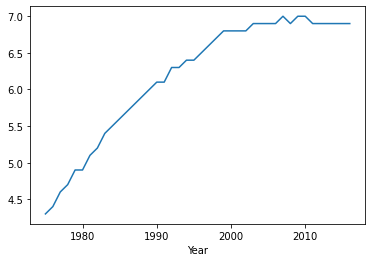

In [65]:
df_brazil = df_obesity[df_obesity['Country'] == 'Brazil']
(df_brazil[df_brazil['Sex'] == 'Female']['Obesity'] - df_brazil[df_brazil['Sex'] == 'Male']['Obesity']).plot()

##### Questão 6 - Monte um gráfico mostrando a evolução da obseidade para ambos os sexos no mundo.

<AxesSubplot: xlabel='Year'>

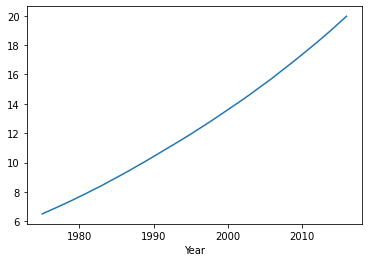

In [67]:
df_both = df_obesity[df_obesity['Sex'] == 'Both sexes']
df_both.groupby('Year')['Obesity'].mean().plot()